# **Support Vector Machines**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4

<br>

## **Business Understanding**

**Objective:**

The objective of this project is to develop a support vector machine (SVM) classifier for binary classification of images of cats and dogs. I will utilise the [cat_dog.csv](https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification/data) data set, which includes image file names and corresponding labels indicating whether the image contains a cat (0) or a dog (1). The project aims to create a robust SVM model capable of accurately classifying new images as either cats or dogs based on their features.

**Data Set:**

The data set cat_dog.csv contains information about images of cats and dogs, with each row representing an image file name (e.g., dog.11289.jpg) and its corresponding label (0 for cat, 1 for dog). This data set will be used to train and evaluate the SVM classifier.

<br>

## **Data Understanding**

#### **Data Source:**

The data set cat_dog.csv has been provided for this project. It consists of image file names and binary labels indicating whether the image contains a cat or a dog.

#### **Data Exploration:**

Before proceeding with modeling, I will explore the data to understand its structure, distribution, and characteristics. This exploration will help in identifying any data preprocessing steps required and gaining insights into the features of the images.

#### **Change Log:** 
- Added cat_dog.csv data set.

<br>

## **Data Preparation**

#### **Preprocessing:**
1. Check for missing values and handle them appropriately.
2. Load and preprocess the images to extract features.
3. Split the data set into training and testing sets to evaluate the performance of the SVM classifier.

#### **Change Log:**
- Checked for missing values and handled them appropriately.
- Reduced the dataset size to 1000 images each for cats and dogs.

#### **Loading the Data:**

In [35]:
import os
import pandas as pd

# Load the CSV file containing image file names and labels
data = pd.read_csv("cat_dog.csv")

# Check for missing values
missing_values = data.isnull().sum()

#### **Sampling Subset:**

In [8]:
# Sample 1000 cat images and 1000 dog images
cat_subset = data[data['labels'] == 0].sample(n=1000, random_state=42)
dog_subset = data[data['labels'] == 1].sample(n=1000, random_state=42)

# Concatenate the sampled subsets
data_subset = pd.concat([cat_subset, dog_subset], ignore_index=True)


#### **Loading and Processing Images:**

In [9]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Path to the folder containing images
image_folder = r"C:\Users\danie.LAPTOP-GOIIMLLB\Desktop\ML2\cat_dog"

# Load image file names from the folder
image_files = os.listdir(image_folder)

# Filter image files based on the sampled subset
image_files_subset = data_subset['image'].tolist()

# Extract image features for the sampled subset
X = []
for file_name in image_files_subset:
    file_path = os.path.join(image_folder, file_name)
    img = imread(file_path)
    img_resized = resize(img, (100, 100))  # Resize image to a fixed size
    features = img_resized.flatten()  # Flatten image to a feature vector
    X.append(features)

X = np.array(X)


<br>

## **Modeling**

In this stage, the scikit-learn library was employed to create an SVM classifier with a radial basis function (RBF) kernel. The SVM model was trained on the extracted features from the images and their corresponding labels. This step is crucial as it forms the foundation of the classification process, where the model learns patterns and relationships within the data to make accurate predictions.

#### **Change Log:**
- Utilised scikit-learn's SVC with an RBF kernel for training the SVM classifier.
- Trained the SVM classifier on the image features and corresponding labels.

#### **Training the Support Vector Machine (SVM) Classifier:**

In [6]:
from sklearn.svm import SVC

# Define the SVM classifier with a radial basis function (RBF) kernel
model = SVC(kernel='rbf')

# Train the SVM classifier on the image features and corresponding labels
model.fit(X, data_subset['labels'])


SVC()

<br>

## **Evaluation**

After training the SVM classifier, it was important to assess its performance to ensure its effectiveness in classifying cat and dog images accurately. To achieve this, several evaluation metrics were employed, including accuracy, precision, recall, F1-score, and confusion matrix. These metrics provide comprehensive insights into the classifier's performance, highlighting its strengths and areas for improvement.

#### **Change Log:**
- Evaluated the trained SVM classifier using accuracy, precision, recall, F1-score, and confusion matrix.
- Assessed the performance of the classifier to ensure its effectiveness in classifying cat and dog images accurately.

#### **Splitting the Data into Training and Testing Sets:**

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_subset['labels'], test_size=0.2, random_state=42)


#### **Plotting First 20 Test Images with Predicted Labels:**

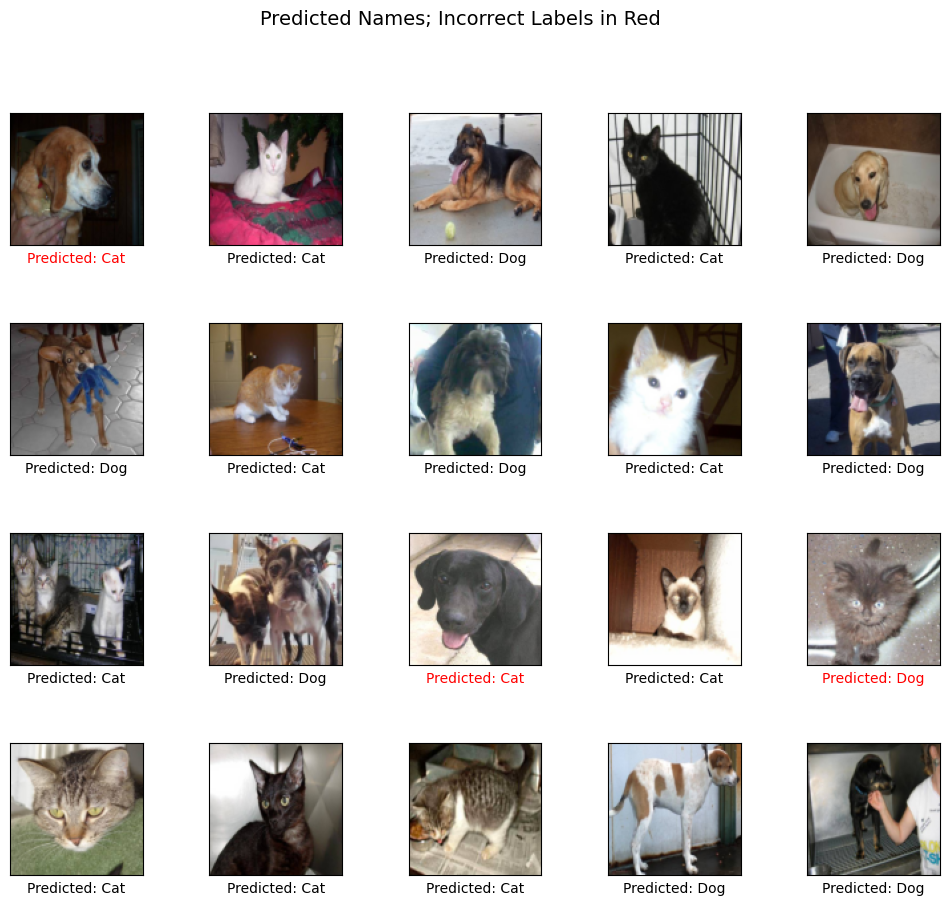

In [33]:
import matplotlib.pyplot as plt

# Plot the first 20 test images along with their predicted labels
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat[:20]):  # Only plot the first 20 images
    # Plot the image
    ax.imshow(X_test[i].reshape(100, 100, 3))  # Reshape the image to its original dimensions
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Get the predicted label
    predicted_label = model.predict([X_test[i]])[0]
    
    # Set the label text and color based on correctness
    if predicted_label == y_test.iloc[i]:
        ax.set_xlabel("Predicted: Dog" if predicted_label == 1 else "Predicted: Cat", color='black')
    else:
        ax.set_xlabel("Predicted: Dog" if predicted_label == 1 else "Predicted: Cat", color='red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

plt.show()

#### **Evaluating the Model:**

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       199
           1       0.89      0.89      0.89       201

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
[[178  21]
 [ 23 178]]


#### **Plotting Confusion Matrix:**

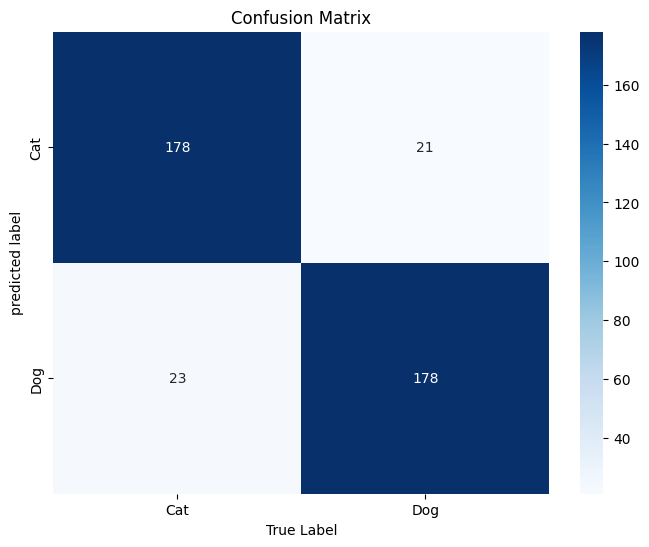

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('True Label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()


<br>

## **Deployment**

#### **Serialised Model:**
I will serialize the trained SVM classifier into a serialized format for deployment. This serialized model can then be integrated into a web application or any other deployment platform for real time predictions.

#### **Change Log:**
- Serialised the trained SVM classifier into a pickle file.

In [37]:
import pickle

# Serialize the trained model using pickle and save it to a file named 'model.pkl'
with open('models/model.pkl', 'wb') as file:
    pickle.dump(model, file)

<br>

## **Conclusion**

In this project, I used Support Vector Machines (SVMs) to build a classifier capable of distinguishing between images of cats and dogs. Here are the key takeaways from the exploration:

#### **Key Findings:**
1. **Data Exploration:** The analysis of the cat_dog.csv dataset provided insights into the structure and characteristics of the image data, guiding preprocessing steps and feature extraction methods.

2. **Data Preparation:** Preprocessing involved handling missing values and sampling a subset of the dataset to reduce computation time. Images were loaded, resized, and flattened to create feature vectors suitable for training the SVM model.

3. **Modeling:** A Support Vector Machine classifier with a radial basis function (RBF) kernel was trained on the extracted image features to learn the underlying patterns and relationships between cat and dog images.

4. **Evaluation:** The trained SVM model was evaluated using metrics such as accuracy, precision, recall, and F1-score. Additionally, a confusion matrix was visualized to assess the classification performance.

#### **Key Outcomes:**
- **Model Performance:** The SVM classifier achieved an accuracy of 89%, demonstrating its effectiveness in distinguishing between images of cats and dogs. Precision, recall, and F1-score metrics provided further insights into the classifier's performance.

#### **Conclusion:**
In conclusion, the Support Vector Machine (SVM) classifier proved to be a robust model for classifying images of cats and dogs based on their features. With an accuracy of 89%, the SVM model showcased promising performance in distinguishing between the two classes. This project highlights the effectiveness of SVMs in image classification tasks.

Overall, further experimentation and fine-tuning of the SVM model could potentially enhance its performance and applicability in real-world scenarios. Overall, this project adds value to the exploration of Support Vector Machines and their applications in image recognition and classification.